In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:

df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [9]:
X = df.drop(columns=["Machine failure","Product ID"])
Y = df[["Machine failure"]]

In [10]:
X.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [11]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

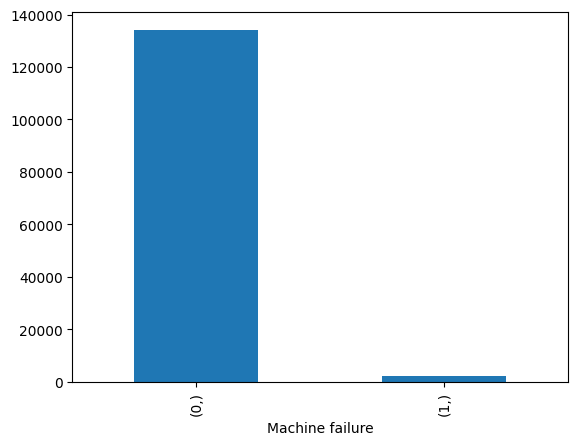

In [13]:
Y.value_counts().plot(kind='bar')

In [14]:
X.dtypes

id                           int64
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [15]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [16]:
cat

['Type']

In [17]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [20]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [21]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [22]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [24]:
xtrain.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
29391,-0.985764,-0.194806,0.620091,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
111006,1.086542,0.073688,1.053251,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
16102,-1.323188,0.288483,0.475704,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
110599,1.076208,1.040265,0.764477,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
84638,0.417026,2.114241,2.280539,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [25]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [26]:
xtest.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
22333,-1.164976,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
35216,-0.837860,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
112970,1.136410,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
14905,-1.353582,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
25676,-1.080093,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [27]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


In [28]:
xtrain.shape

(109143, 14)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [30]:
dct = {
    "Logistic" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}
    

In [31]:

dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...))])

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [33]:
train_scores = []
test_scores = []
cv_scores = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain.values, ytrain.values)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain.values)
    ypred_test = model.predict(xtest.values)
    # Get the f1 macro score in train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")
    # Calculate cross validated score
    scores = cross_val_score(model, xtrain.values, ytrain.values, cv=5, scoring="f1_macro")
    cv = scores.mean()
    # Append all the values in list
    train_scores.append(f1_train)
    test_scores.append(f1_test)
    cv_scores.append(cv)
    # Print above results
    print(f"Model Name : {name}\n")
    print(f"F1 Train : {f1_train:.4f}")
    print(f"F1 Test : {f1_test:.4f}")
    print(f"5 Fold Cross validated F1 : {cv:.4f}")
    print('\n========================================================\n')




Model Name : Logistic

F1 Train : 0.9316
F1 Test : 0.9255
5 Fold Cross validated F1 : 0.9310


Model Name : Decision Tree

F1 Train : 1.0000
F1 Test : 0.8793
5 Fold Cross validated F1 : 0.8738


Model Name : Random Forest

F1 Train : 0.9997
F1 Test : 0.9268
5 Fold Cross validated F1 : 0.9303


Model Name : Gradient Boost

F1 Train : 0.9360
F1 Test : 0.9243
5 Fold Cross validated F1 : 0.9284


Model Name : XGBoost

F1 Train : 0.9564
F1 Test : 0.9241
5 Fold Cross validated F1 : 0.9281




In [34]:
results = {
    "model_name" : dct.keys(),
    "f1_train" : train_scores,
    "f1_test": test_scores,
    "f1_cv" : cv_scores
}

In [35]:
df_results = pd.DataFrame(results)
df_results

,model_name,f1_train,f1_test,f1_cv
0,Logistic,0.931602,0.925459,0.931022
1,Decision Tree,1.000000,0.879320,0.873808
2,Random Forest,0.999704,0.926802,0.930287
3,Gradient Boost,0.935967,0.924313,0.928383
4,XGBoost,0.956400,0.924138,0.928062


In [36]:
df_results.sort_values(by="f1_cv", ascending=False)

,model_name,f1_train,f1_test,f1_cv
0,Logistic,0.931602,0.925459,0.931022
2,Random Forest,0.999704,0.926802,0.930287
3,Gradient Boost,0.935967,0.924313,0.928383
4,XGBoost,0.956400,0.924138,0.928062
1,Decision Tree,1.000000,0.879320,0.873808


In [53]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [54]:
best_model.score(xtrain, ytrain)

0.9962342981226464

In [55]:
best_model.score(xtest, ytest)

0.9959319797698454

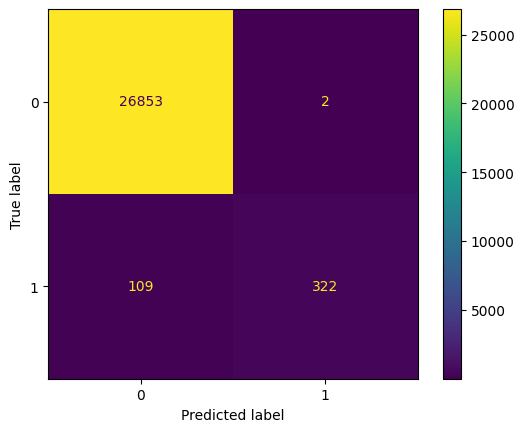

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [57]:
ypred_test = best_model.predict(xtest)

In [58]:
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [59]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       0.99      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



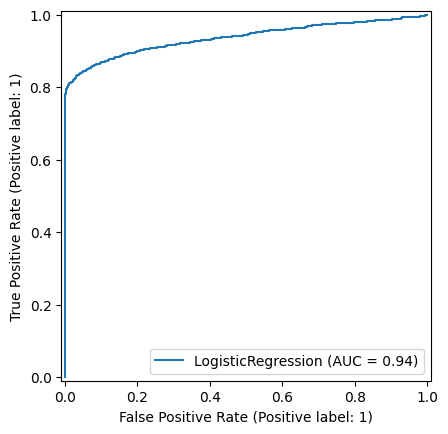

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

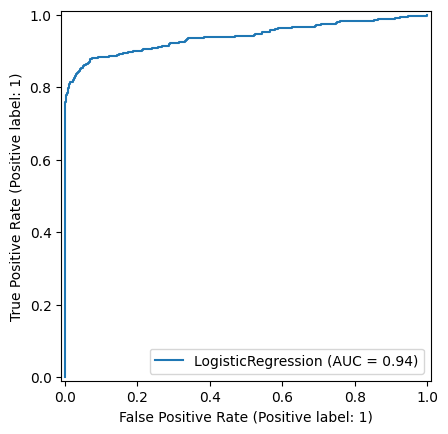

In [62]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [63]:
roc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring="roc_auc")
roc_scores

array([0.93626781, 0.91978354, 0.93199   , 0.94514147, 0.94157643])

In [64]:
roc_scores.mean()

np.float64(0.9349518514304258)

In [65]:
xnew = pd.read_csv("test.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [66]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['id', 'Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [67]:
xnew_pre = pre.transform(xnew)

In [68]:
xnew_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.732064,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.732089,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,1.732114,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,1.732140,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.732165,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [69]:
pred = best_model.predict(xnew_pre)
prob = best_model.predict_proba(xnew_pre)

In [70]:
pred[0:5]

array([0, 0, 0, 0, 0])

In [71]:
prob[0:5]

array([[0.99739133, 0.00260867],
       [0.99856254, 0.00143746],
       [0.99683462, 0.00316538],
       [0.99619997, 0.00380003],
       [0.99591632, 0.00408368]])

In [72]:
best_model.classes_

array([0, 1])

In [74]:
prob_Failure = prob[:, 1]
prob_Failure[0:5]

array([0.00260867, 0.00143746, 0.00316538, 0.00380003, 0.00408368])

In [75]:
df_final = xnew[['id']]
df_final["Machine failure"] = pred
df_final["Probability"] = prob_Failure

In [76]:
df_final

,id,Machine failure,Probability
0,136429,0,0.002609
1,136430,0,0.001437
2,136431,0,0.003165
3,136432,0,0.003800
4,136433,0,0.004084
...,...,...,...
90949,227378,0,0.003295
90950,227379,0,0.000679
90951,227380,0,0.003833
90952,227381,0,0.003452


In [77]:
df_final["Machine failure"].value_counts()

Machine failure
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

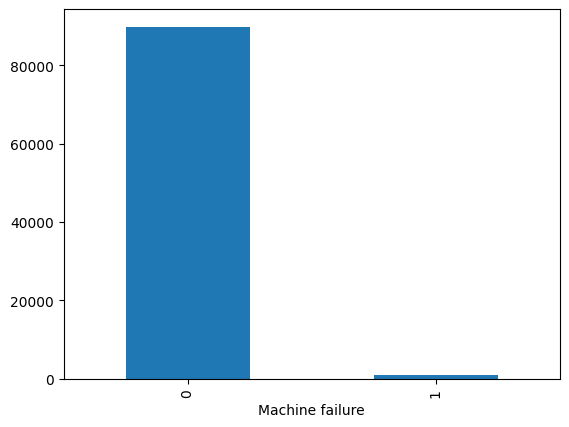

In [78]:
df_final["Machine failure"].value_counts().plot(kind='bar')

In [79]:
df_final.to_csv("Results.csv", index=False)